# 18-9. 프로젝트 : 다양한 OCR모델 비교하기

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import keras_ocr
import os
import io
import cv2 

from google.cloud import vision
from pytesseract import Output
from pytesseract import pytesseract as pt
from PIL import Image, ImageDraw
from glob import glob

## Step1. 검증용 데이터셋 준비

In [2]:
sign = os.getenv('HOME')+'/aiffel/ocr_python/sign/'
os.listdir(sign)

['sign5.jpeg',
 'sign6.jpeg',
 'sign10.jpeg',
 'sign12.jpeg',
 'sign16.jpeg',
 'sign20.jpeg',
 'sign2.jpeg',
 'sign15.jpeg',
 'sign13.jpeg',
 'sign9.jpeg',
 'sign14.jpeg',
 'sign7.jpeg',
 'sign11.jpeg',
 'sign3.jpeg',
 'sign18.jpeg',
 'sign4.jpeg',
 'sign8.jpeg',
 'sign19.jpeg',
 'sign1.jpeg',
 'sign17.jpeg']

In [3]:
images = glob(sign+'*.jpeg')
images

['/home/aiffel-dj50/aiffel/ocr_python/sign/sign5.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign6.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign10.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign12.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign16.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign20.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign2.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign15.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign13.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign9.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign14.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign7.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign11.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign3.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign18.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign4.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/sign/sign8.jpeg',
 '/home/aiffel-dj50/aiffel/ocr_python/s

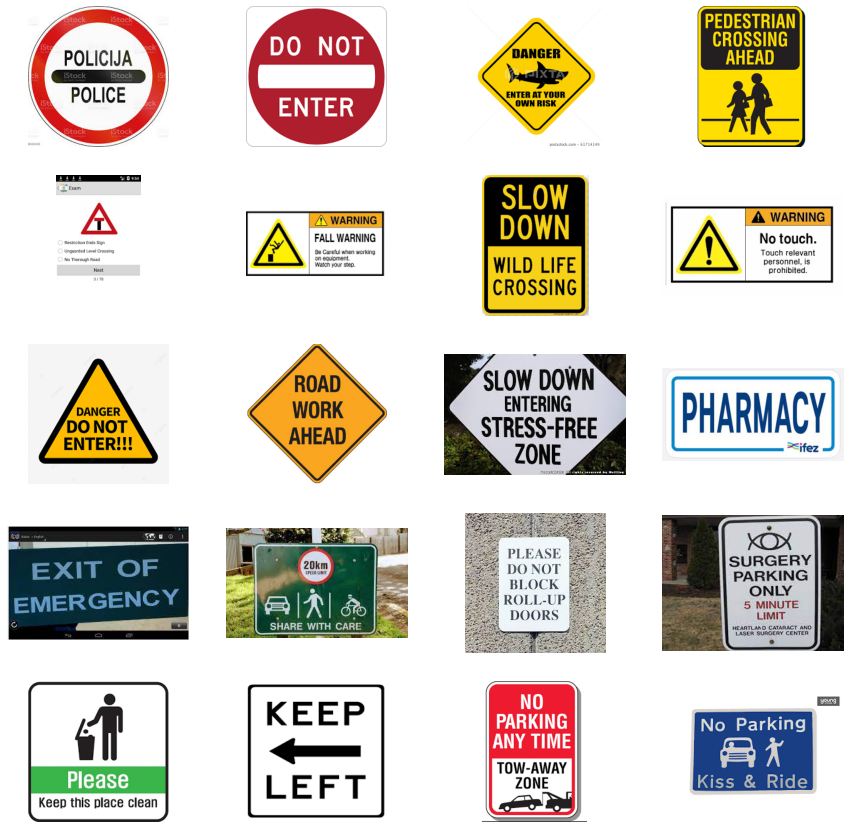

In [4]:
plt.figure(figsize=(15, 15))

for idx, image in enumerate(images):
    plt.subplot(5, 4, idx+1)
    im=img.imread(image)
    plt.imshow(im)
    plt.axis('off')

## Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행 

In [5]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [6]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = os.getenv('HOME')+'/aiffel/ocr_python/sign/sign3.jpeg'# [[YOUR IMAGE FILE PATH]]   

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

-rw-rw-r-- 1 aiffel-dj50 aiffel-dj50 2340  3월 16 11:00 /home/aiffel-dj50/aiffel/ocr_python/my_google_api_key.json
Texts:

"20km
SPID LIMIT
大|命
SHARE WITH CARE
"

"20km"

"SPID"

"LIMIT"

"大"

"|"

"命"

"SHARE"

"WITH"

"CARE"
bounds: (174,151),(213,151),(213,161),(174,161)


In [7]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj50/.keras-ocr/craft_mlt_25k.h5
Looking for /home/aiffel-dj50/.keras-ocr/crnn_kurapan.h5


In [8]:
images2 = [ keras_ocr.tools.read(i) for i in images]
prediction_groups = [pipeline.recognize([i]) for i in images2]

/home/aiffel-dj50/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


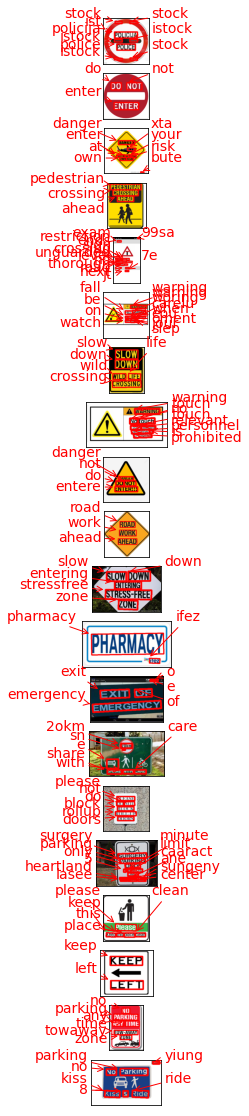

In [9]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images2), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images2[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [12]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt


def crop_word_regions(image_path='./sign/sign18.jpeg', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/sign'
img_file_path = work_dir + '/sign18.jpeg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/home/aiffel-dj50/aiffel/ocr_python/sign/0000.png
/home/aiffel-dj50/aiffel/ocr_python/sign/0001.png
/home/aiffel-dj50/aiffel/ocr_python/sign/0002.png
/home/aiffel-dj50/aiffel/ocr_python/sign/0003.png


In [13]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

1)()

NOTE

BLOCK


Done


## Step3. 테스트 결과 정리 

#### 1.첫 번째 사용한 기술은 Google의 OCR API 기술이다.사용 결과, 준수한 성능을 보이고 있다. 
#### 2.두 번째 사용한 기술은 keras-ocr이다. keras-ocr은 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR을 할 수 있게 해준다.검출된 결과는 아주 훌륭하다.구글 API와 비슷한 Detect 성능을 보여준다
#### 3.세 번째로 사용해본 기술은 구글의 테서랙트(Tesseract) 라이브러리이다.검출 결과는 앞선 모델보다 성능이 떨어져 보인다. 

## Step4. 결과 분석과 결론 제시

#### 원본 이미지에 비해 Google의 OCR API가 가장 성능이 좋고, 그 다음이 keras-ocr ,Tesseract는 제일 낮은 성능을 보여 주는것 같다. 만약 위의 세가지 모델 중에서 OCR 서비스에 적용해야 된다고 한다면 구글의 OCR API를 도입할 것 같가다. 

## 총평

### 시간이 너무 촉박하게 과제를 시작해서 너무 힘들었고 에러가 너무 많이 났던 과제였습니다. 하지만 텍스트를 검출하는 OCR기술이 너무 매력적이고 자연어에 관심을 갖게 된 계기가 된것 같습니다. 다음 과제는 좀더 성실하게 하겠습니다. 졸린눈을 비비며 포기할까 하다가 끝까지 해낸 끈기를 높이 사 주세요^^